## Analysis of an E-commerce Dataset Part 3 (s2 2023)


In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the ratings have been converted to like (with score 1) and dislike (with score 0). Your task is to train classification models such as KNN to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item | helpfulness | gender | category | item_id | item_price | user_city | rating |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the like (corresponding to rating 1) and dislike (corresponding to rating 0) in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.
    

### Student Name : Budhil Chakma
### Student ID : 47554266

In [11]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

## Exploring the dataset

In [2]:
#reading the dataset
dataset_read = pd.read_csv('portfolio_3.csv')

In [4]:
dataset_read.head()

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,Not always McCrap,McDonald's,3,M,Restaurants & Gourmet,41,30.74,4,1
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,4,M,Restaurants & Gourmet,74,108.30,4,0
2,4081,72000,The Wonderful World of Wendy,Wendy's,4,M,Restaurants & Gourmet,84,69.00,4,1
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",3,M,Movies,68,143.11,4,1
4,4081,100399,Hey! Gimme some pie!,American Pie,3,M,Movies,6,117.89,4,0


In [5]:
dataset_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   helpfulness  2685 non-null   int64  
 5   gender       2685 non-null   object 
 6   category     2685 non-null   object 
 7   item_id      2685 non-null   int64  
 8   item_price   2685 non-null   float64
 9   user_city    2685 non-null   int64  
 10  rating       2685 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 230.9+ KB


In [6]:
dataset_read.shape[0]

2685

In [7]:
dataset_read.shape[1]

11

In [8]:
dataset_read.columns

Index(['userId', 'timestamp', 'review', 'item', 'helpfulness', 'gender',
       'category', 'item_id', 'item_price', 'user_city', 'rating'],
      dtype='object')

## Converting object features into numeric values

In [12]:
#converting categorical features into numerial version

datasetNumeric = OrdinalEncoder()
dataset_read["review_num"]= datasetNumeric.fit_transform(dataset_read[["review"]])
dataset_read["category_num"]= datasetNumeric.fit_transform(dataset_read[["category"]])
dataset_read["gender_num"]= datasetNumeric.fit_transform(dataset_read[["gender"]])
dataset_read["item_num"]= datasetNumeric.fit_transform(dataset_read[["item"]])

## Observing the correlation between ratings and other features

In [48]:
# droping null values (if any)
dataset_read = dataset_read.dropna()

In [15]:
dataset_read.corr()

C:\Users\Budhil\AppData\Local\Temp\ipykernel_15112\4164624592.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_read.corr()


,userId,timestamp,helpfulness,item_id,item_price,user_city,rating,review_num,category_num,gender_num,item_num
userId,1.000000,-0.069176,-0.166136,-0.005549,0.024576,-0.030031,0.066444,0.007139,-0.041362,-0.058324,-0.005513
timestamp,-0.069176,1.000000,0.014179,-0.004452,0.010979,-0.014934,-0.009739,0.007029,0.015009,-0.003367,-0.003543
helpfulness,-0.166136,0.014179,1.000000,-0.019882,0.004112,0.012086,-0.010622,-0.028259,-0.013408,0.075947,-0.020433
item_id,-0.005549,-0.004452,-0.019882,1.000000,-0.054450,-0.005576,0.057107,0.163544,-0.045268,0.002370,0.999765
item_price,0.024576,0.010979,0.004112,-0.054450,1.000000,-0.023427,0.026062,-0.041421,-0.115571,-0.040596,-0.049885
user_city,-0.030031,-0.014934,0.012086,-0.005576,-0.023427,1.000000,-0.034866,0.045626,0.008017,-0.065638,-0.005220
rating,0.066444,-0.009739,-0.010622,0.057107,0.026062,-0.034866,1.000000,-0.041756,-0.142479,-0.022169,0.057793
review_num,0.007139,0.007029,-0.028259,0.163544,-0.041421,0.045626,-0.041756,1.000000,0.001970,-0.037884,0.163090
category_num,-0.041362,0.015009,-0.013408,-0.045268,-0.115571,0.008017,-0.142479,0.001970,1.000000,0.022549,-0.045988
gender_num,-0.058324,-0.003367,0.075947,0.002370,-0.040596,-0.065638,-0.022169,-0.037884,0.022549,1.000000,0.001925


## Spliting the dataset and training logistic regression models and evaluating them

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
train, test=train_test_split(dataset_read, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(2148, 15)
(537, 15)


For model 1 I have selected 5 features which are more related to the ratings then other features. 

In [50]:


# Selecting the features and the target variable for training and testing sets
X_train_selected = train[['userId', 'item_id', 'item_price', 'item_num', 'category_num']]
y_train_selected = train['rating']

X_test_selected = test[['userId', 'item_id', 'item_price', 'item_num', 'category_num']]
y_test_selected = test['rating']

# Initializing and training the Linear Regression model
reg_selected = linear_model.LinearRegression()
reg_selected.fit(X_train_selected, y_train_selected)

# Making predictions on the testing set
predicted_selected = reg_selected.predict(X_test_selected)

# Calculating the Mean Squared Error, Root Mean Squared Error, and R Squared for selected features
mse_selected_1 = ((np.array(y_test_selected) - predicted_selected)**2).sum() / len(y_test_selected)
root_mse_selected_1 = np.sqrt(mse_selected)
r2_selected_1 = r2_score(y_test_selected, predicted_selected)

# Print statements for Model 1 (Using Selected Features)
print("Model 1 (Using Selected Features):")
print(f"Mean Squared Error (MSE): ", mse_selected_1 )
print(f"Root Mean Squared Error (Root MSE): ", root_mse_selected_1)
print(f"R Squared (R2):", r2_selected_1)

Model 1 (Using Selected Features):
Mean Squared Error (MSE):  0.21592529937540397
Root Mean Squared Error (Root MSE):  0.4646379286997418
R Squared (R2): 0.025599157215957624


In [49]:


# Selecting All features and the target variable for training and testing sets
X_train_selected = train[['userId', 'timestamp','helpfulness','item_id','item_price', 'user_city', 'review_num', 'category_num', 'gender_num', 'item_num']]
y_train_selected = train['rating']

X_test_selected = test[['userId', 'timestamp','helpfulness','item_id','item_price', 'user_city', 'review_num', 'category_num', 'gender_num', 'item_num']]
y_test_selected = test['rating']

# Initializing and training the Linear Regression model
reg_selected = linear_model.LinearRegression()
reg_selected.fit(X_train_selected, y_train_selected)

# Making predictions on the testing set
predicted_selected = reg_selected.predict(X_test_selected)

# Calculating the Mean Squared Error, Root Mean Squared Error, and R Squared for selected features
mse_selected_2 = ((np.array(y_test_selected) - predicted_selected)**2).sum() / len(y_test_selected)
root_mse_selected_2 = np.sqrt(mse_selected)
r2_selected_2 = r2_score(y_test_selected, predicted_selected)

# Print statements for Model 2 (Using Selected Features)
print("Model 2 (All Features):")
print("Mean Squared Error (MSE): ", mse_selected_2 )
print("Root Mean Squared Error (Root MSE): ", root_mse_selected_2)
print("R Squared (R2):", r2_selected_2)

Model 2 (All Features):
Mean Squared Error (MSE):  0.21588840478638632
Root Mean Squared Error (Root MSE):  0.4646379286997418
R Squared (R2): 0.02576565052978863


### Evaluation 

The performance metrics of the two models are very similar, with only slight differences in Mean Squared Error (MSE) and r squared score. Here are some insights and conclusions based on the comparison:

#### feature Selection:

The selection of specific features ('userId', 'item_id', 'item_price', 'item_num', 'category_num') did not significantly improve the model performance compared to using all available features.
The r squared scores are quite low for both models, indicating that the selected features, as well as all features, do not explain a significant amount of variance in the target variable (rating).

#### Model Performance:

Both models have almost identical MSE and Root MSE, suggesting similar levels of prediction error.
The slightly higher r squared score in Model 2 (All Features) suggests that including more features may capture a bit more variance in the target variable, but the difference is marginal.

#### Conclusion:

The feature selection in this case did not lead to a significant improvement in model performance. It might be beneficial to explore other feature selection methods, feature engineering, or try different machine learning models to improve the predictive performance.
Given the low r squared scores, Linear Regression may not be the best model for this data. Other models might be better suited to capture the complex relationships between the features and the target variable.
These observations provide a basis for further exploration and tuning to improve model performance and better understand the relationships within the data.

## Training and evaluating KNN models on the same dataset

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Define the features and target variable for Model 1
X_train_model1 = train[['userId', 'item_id', 'item_price', 'item_num', 'category_num']]
y_train_model1 = train['rating']
X_test_model1 = test[['userId', 'item_id', 'item_price', 'item_num', 'category_num']]
y_test_model1 = test['rating']

# Initialize the KNN classifier with K=5 for Model 1
knn_model1 = KNeighborsClassifier(n_neighbors=23)

# Train the KNN model for Model 1
knn_model1.fit(X_train_model1, y_train_model1)

# Evaluate the accuracy of Model 1
accuracy_model1 = knn_model1.score(X_test_model1, y_test_model1)

### Model 2: Using All Features

# Define the features and target variable for Model 2
X_train_model2 = train[['userId', 'timestamp','helpfulness','item_id','item_price', 'user_city', 'review_num', 'category_num', 'gender_num', 'item_num']]
y_train_model2 = train['rating']
X_test_model2 = test[['userId', 'timestamp','helpfulness','item_id','item_price', 'user_city', 'review_num', 'category_num', 'gender_num', 'item_num']]
y_test_model2 = test['rating']

# Initialize the KNN classifier with K=5 for Model 2
knn_model2 = KNeighborsClassifier(n_neighbors=23)

# Train the KNN model for Model 2
knn_model2.fit(X_train_model2, y_train_model2)

# Evaluate the accuracy of Model 2
accuracy_model2 = knn_model2.score(X_test_model2, y_test_model2)

accuracy_model1, accuracy_model2


(0.6480446927374302, 0.62756052141527)

### Results:
Model 1 Accuracy: 64.8%
Model 2 Accuracy: 62.8%
#### Analysis:

#### Performance:
Both models have comparable performance with an accuracy around 63% to 65%.Model 1 performs slightly better than Model 2 with about 2% higher accuracy.
#### Selection of K:
The chosen K=23 is the sqaure root of the test size which is 537, although, based on the further analysis of misclassification error, different value of K might be a more optimal choice.
#### Feature Set:
The different feature sets used in Model 1 and Model 2 have a minor impact on the accuracy. The simpler feature set in Model 1 appears to achieve slightly better performance.
#### Further Improvements:
The accuracy could potentially be improved by tuning the hyperparameter K further, or by using other machine learning models.
Feature engineering, normalization of the data, and handling of categorical variables might also lead to better model performance.
#### Conclusion:
The provided KNN models with K=23 achieve a decent level of accuracy, but there's room for improvement. Experimentation with other K values, machine learning models, and feature engineering techniques could lead to better predictive performance.

## Tuning the hyper-parameter K in KNN to see how it influences the prediction performance

In [36]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt



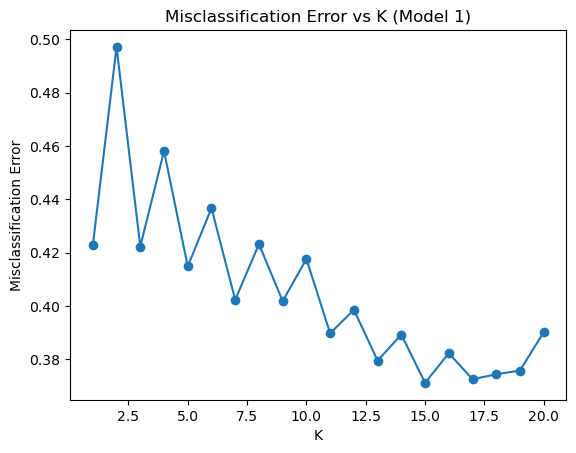

In [44]:
k_values = range(1, 21)  # Evaluating K from 1 to 20
cv_scores_model1 = []  # List to hold the cross-validated accuracy for each value of K

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_model1, y_train_model1, cv=5, scoring='accuracy')
    cv_scores_model1.append(scores.mean())

# Plotting the misclassification error versus K
plt.figure()
plt.plot(k_values, [1 - score for score in cv_scores_model1], marker='o')
plt.title('Misclassification Error vs K (Model 1)')
plt.xlabel('K')
plt.ylabel('Misclassification Error')
plt.show()


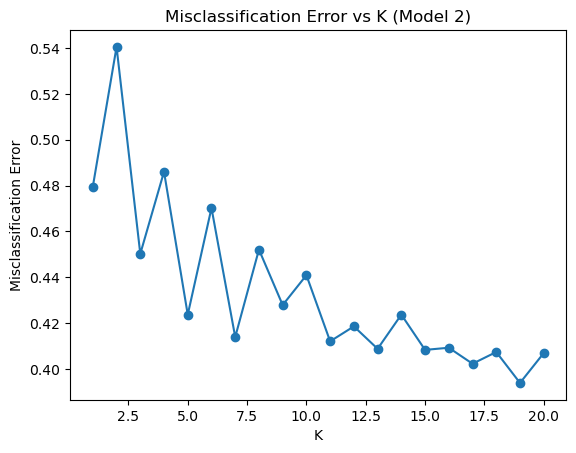

In [52]:
cv_scores_model2 = []  # List to hold the cross-validated accuracy for each value of K

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_model2, y_train_model2, cv=5, scoring='accuracy')
    cv_scores_model2.append(scores.mean())

# Plotting the misclassification error versus K
plt.figure()
plt.plot(k_values, [1 - score for score in cv_scores_model2], marker='o')
plt.title('Misclassification Error vs K (Model 2)')
plt.xlabel('K')
plt.ylabel('Misclassification Error')
plt.show()


### Observations:

#### Optimal K Values:
For Model 1, the misclassification error seems to be lowest around 
 K=15.
For Model 2, the misclassification error appears to be lowest around 
K= 18.5 or K= 19.5.
#### Trend:
In both models, as K increases, the misclassification error generally decreases. This suggests that a higher value of K helps in reducing the error, likely by smoothing out the decision boundary and reducing the influence of noise in the data.
However, there's a point beyond which increasing K doesn't lead to further reduction in error. This is typical in KNN models, where after a certain point, increasing K may start to include points from other classes, which could potentially increase error or keep it stagnant.
#### Comparison Between Models:
Both models seem to have sligthly different trends and optimal K values. However, the misclassification error for Model 2 is slightly higher than for Model 1 across most K values. This suggests that Model 1 might be a slightly better choice given the selected features, though the difference isn't substantial.
#### Recommendations:
It might be beneficial to choose K=15 for model 1 and K=18.5 for model 2 based on the observed lower misclassification errors.
Additional tuning and potentially exploring other machine learning models or feature engineering techniques could also help in improving the prediction performance.